# Image Classification using VGG16 for Fruits Dataset
This project uses a pre-trained VGG16 model to classify fruits from the Fruits-360 dataset. It demonstrates how to fine-tune a pre-trained model for a custom classification task using Keras and TensorFlow.

# Project Structure
Training Path: Contains the images used for training the model.
Validation Path: Contains images used for validating the model during training.
Test Path: Contains images for testing the model after training.
Key Steps
Importing Required Libraries: Libraries such as keras, sklearn, matplotlib, and glob are imported to handle the model, data generation, and evaluation.

Image Size: The images are resized to [100, 100], which is suitable for training and to reduce computation time while still maintaining essential features for classification.

In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

2024-09-20 16:04:11.885519: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.5.0
/device:GPU:0


2024-09-20 16:04:13.265815: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcuda.so.1
2024-09-20 16:04:13.294420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-09-20 16:04:13.294621: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2024-09-20 16:04:13.294643: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0
2024-09-20 16:04:13.303292: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublas.so.11
2024-09-20 16:04:13.303332: I tensorflow/stre

In [3]:
!ls -ltr archive

total 8
drwxrwxr-x 3 1000 1000 4096 Sep 17 14:02 fruits-360_dataset_100x100
drwxrwxr-x 3 1000 1000 4096 Sep 17 14:02 fruits-360_dataset_original-size


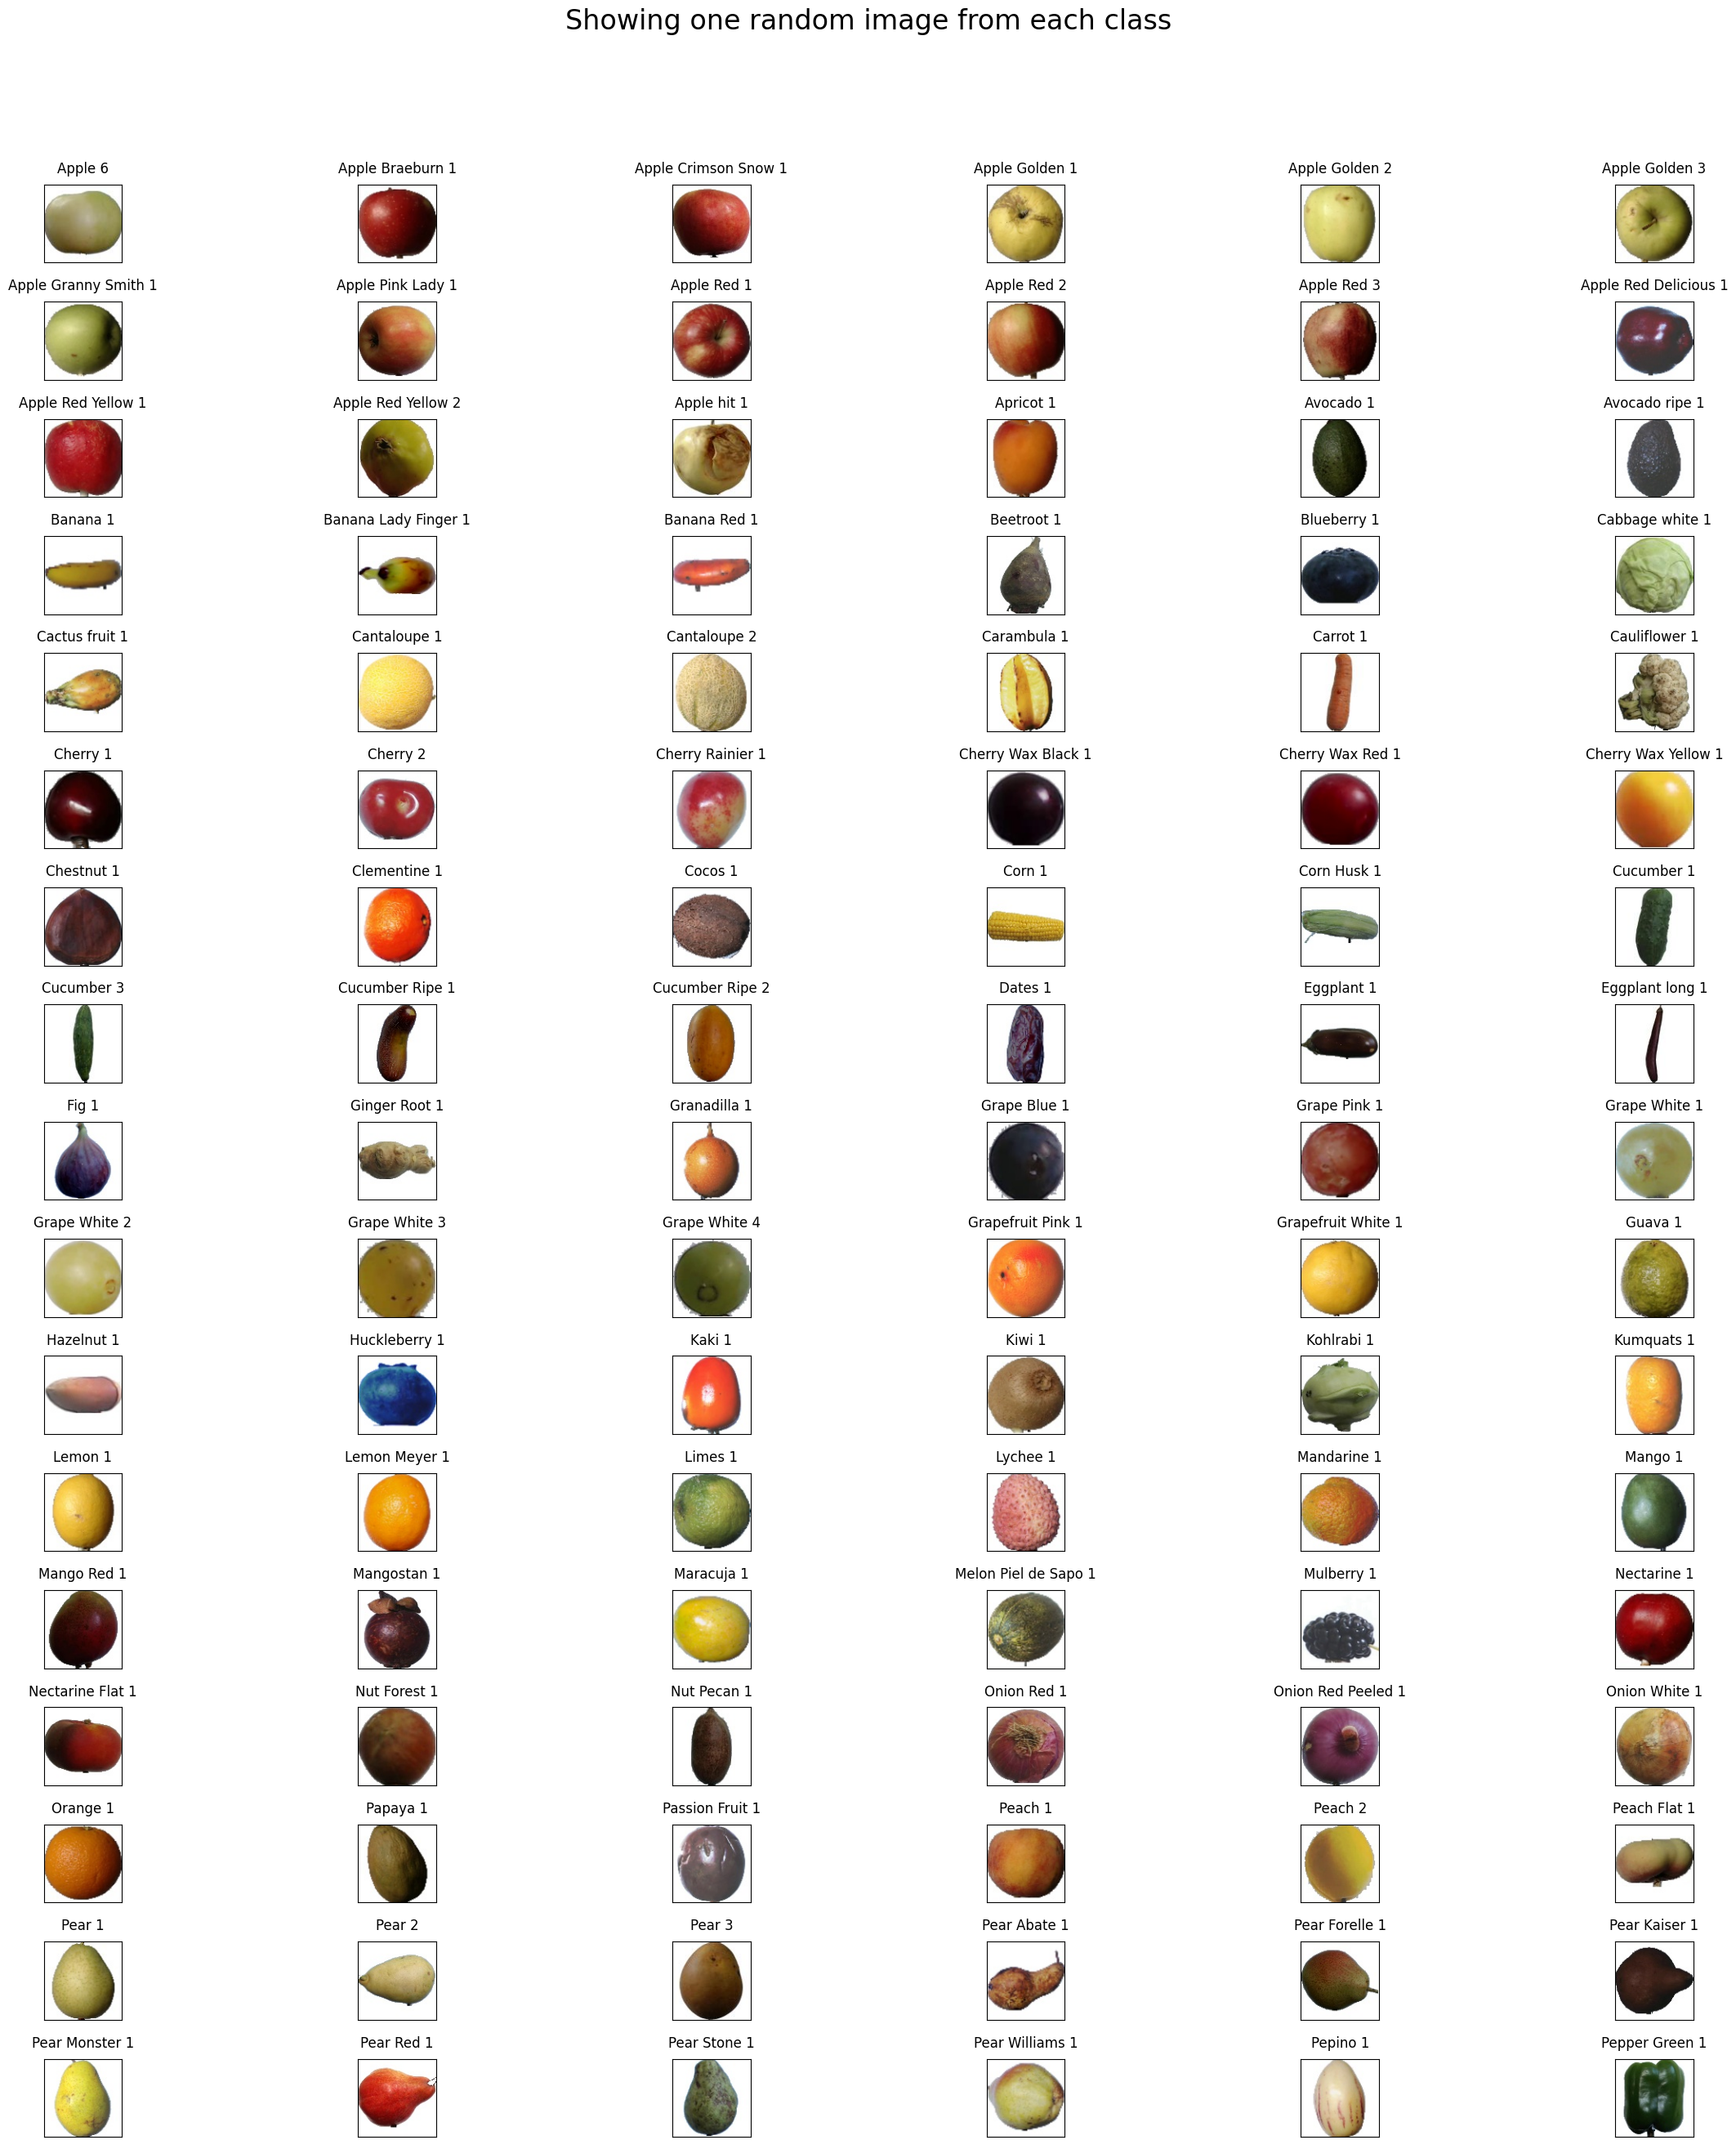

In [4]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "/workspace/archive/fruits-360_dataset_100x100/fruits-360/Training"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [5]:
from keras.layers import Input,Dense,Flatten,Lambda
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [8]:
IMAGE_SIZE=[100,100]

In [9]:
epochs=5
batch_size=32

In [10]:
train_path='/workspace/archive//fruits-360_dataset_original-size/fruits-360-original-size/Training'
test_path='/workspace/archive/fruits-360_dataset_original-size/fruits-360-original-size/Test'
valid_path='/workspace/archive/fruits-360_dataset_original-size/fruits-360-original-size/Validation'

In [11]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [12]:
folders=glob(train_path+'/*')

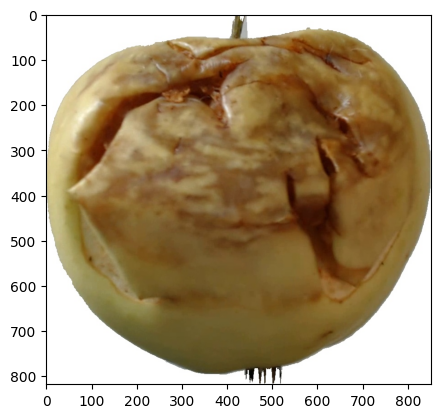

In [13]:
plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.show()

In [14]:
IMAGE_SIZE+[3]

[100, 100, 3]

In [35]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

# Using VGG16 Model:

VGG16 is a powerful model pre-trained on the ImageNet dataset. It has learned rich features across a wide variety of images.
The weights are frozen for all layers by setting layer.trainable = False. This ensures that the pre-trained layers' weights do not change during fine-tuning.

In [36]:
for layer in vgg.layers:
    layer.trainable=False

# Custom Layers for Fine-Tuning:

After flattening the output of VGG16, a Dense layer is added with 1000 units and ReLU activation to introduce non-linearity.
The final layer outputs predictions using a softmax activation, with the number of neurons equal to the number of fruit classes.

In [37]:
x=Flatten()(vgg.output)

In [ ]:
x=Dense(1000,activation='relu')(x)

In [39]:
prediction=Dense(len(folders),activation='softmax')(x)

In [40]:
model=Model(inputs=vgg.input,outputs=prediction)


In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

# Model Compilation:

The model is compiled using categorical cross-entropy as the loss function, which is common for multi-class classification problems.
RMSprop is used as the optimizer, which is effective for this type of deep learning task.
Accuracy is used as the performance metric to monitor during training.

In [42]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# Data Augmentation with ImageDataGenerator:

The ImageDataGenerator is used to generate augmented images during training. The parameters include:
rotation_range=20: Randomly rotates the image within 20 degrees.
width_shift_range=0.1, height_shift_range=0.1: Shifts the image horizontally and vertically.
zoom_range=0.2: Randomly zooms the image.
horizontal_flip and vertical_flip: Randomly flip the image.
This increases the diversity of the training data and reduces overfitting.

In [43]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [44]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 3114 images belonging to 24 classes.
{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_long_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -102.03229 max: 151.061


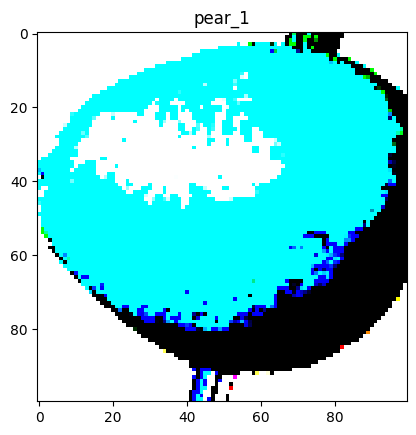

In [45]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [46]:
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [ ]:
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

In [29]:
from sklearn.metrics import classification_report

In [30]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  # cm = confusion_matrix(targets, predictions)
  print("Classification Report:")
  print(classification_report(targets, predictions, target_names=labels))
  # return cm

get_confusion_matrix(train_path, len(image_files))

# cm = get_confusion_matrix(train_path, len(image_files))
# print(cm)
# valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
# print(valid_cm)


Generating confusion matrix 6231
Found 6231 images belonging to 24 classes.
50
Classification Report:
                      precision    recall  f1-score   support

             apple_6       0.96      0.95      0.95       315
    apple_braeburn_1       0.97      0.97      0.97       320
apple_crimson_snow_1       0.95      0.98      0.97       318
      apple_golden_1       0.99      1.00      1.00       308
      apple_golden_2       0.97      0.95      0.96       308
      apple_golden_3       0.84      0.98      0.91       316
apple_granny_smith_1       1.00      0.98      0.99       320
         apple_hit_1       1.00      0.93      0.96       468
   apple_pink_lady_1       0.92      0.98      0.95       313
         apple_red_1       0.98      0.95      0.97       309
         apple_red_2       0.96      0.95      0.95       318
         apple_red_3       0.99      0.98      0.98       281
apple_red_delicios_1       1.00      0.99      1.00       300
  apple_red_yellow_1       1.

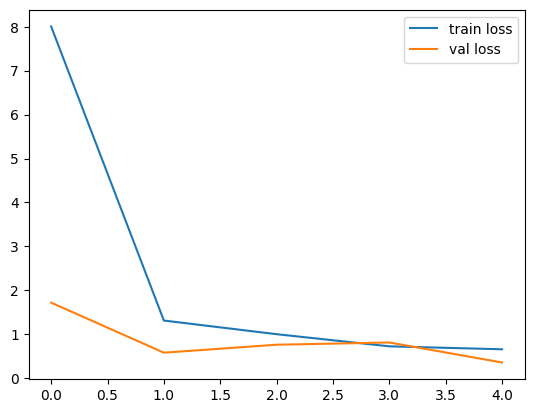

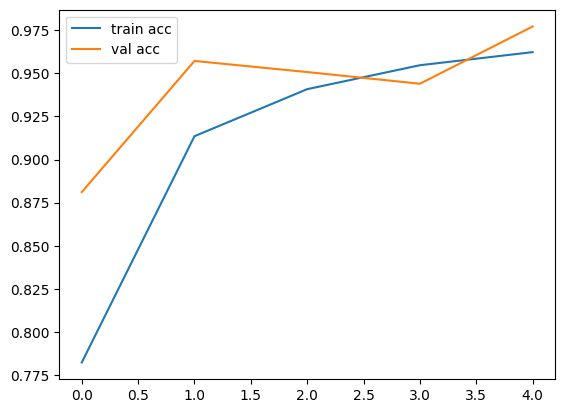

In [31]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [32]:
# # Save the entire model to a HDF5 file
# model.save('fruit_classifier_model.h5')

# print("Model saved successfully.")


In [33]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('fruit_classifier_model.h5')

print("Model loaded successfully.")
model = loaded_model

Model loaded successfully.


Found 3114 images belonging to 24 classes.


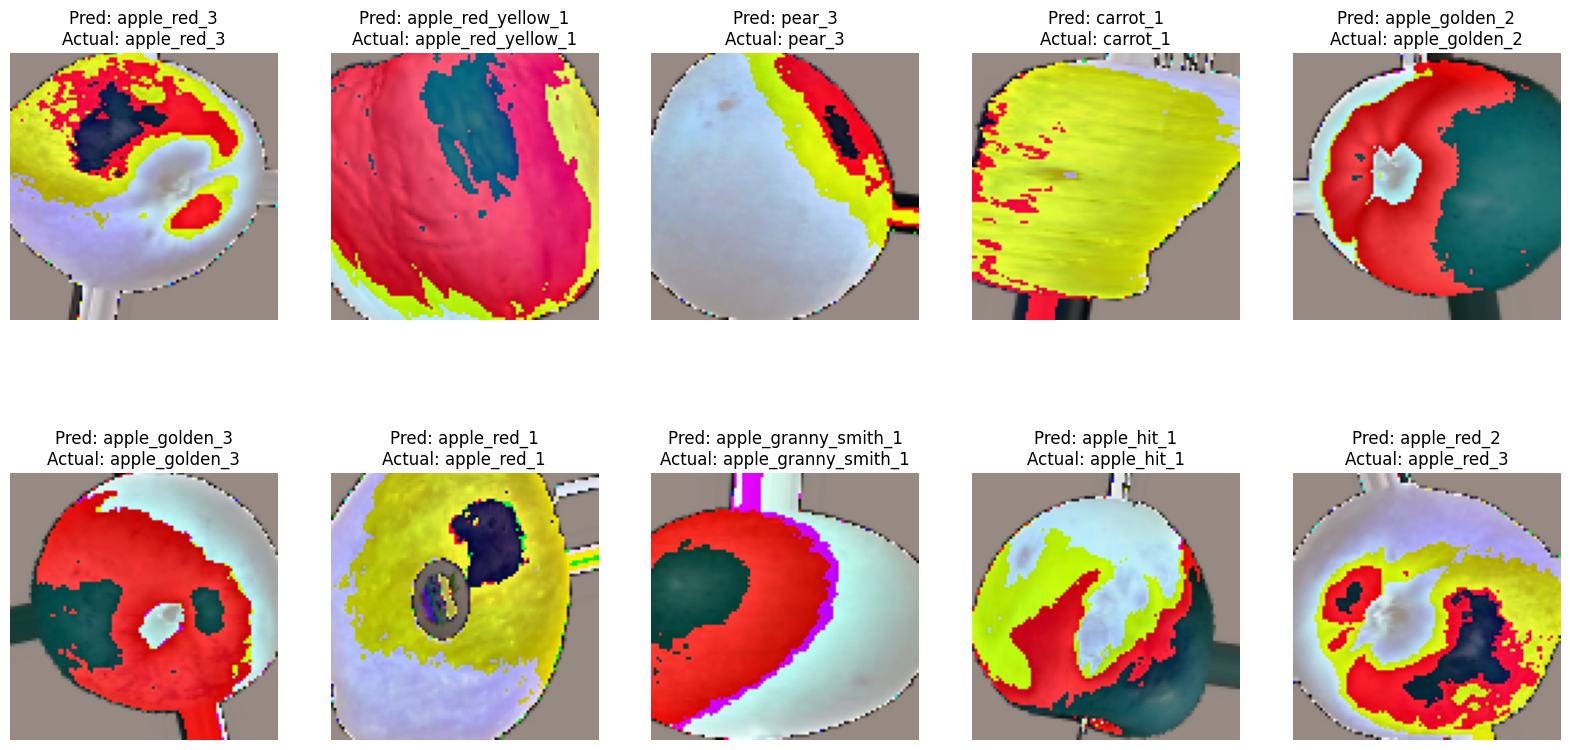

In [34]:
# Function to display 10 random images with predicted labels
def display_random_images_with_predictions(model, gen, labels, num_images=10):
    # Get a batch of images and labels
    x, y = next(gen)
    
    # Randomly select indices for 10 images
    random_indices = random.sample(range(len(x)), num_images)
    
    # Create a plot with 2 rows and 5 columns (for 10 images)
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    
    for i, idx in enumerate(random_indices):
        # Get the actual image
        img = x[idx]
        
        # Reshape image for model prediction
        img_expanded = np.expand_dims(img, axis=0)
        
        # Predict the class for the image
        prediction = model.predict(img_expanded)
        
        # Find the predicted label and the actual label
        predicted_label = labels[np.argmax(prediction)]
        actual_label = labels[np.argmax(y[idx])]
        
        # Plot the image
        ax = axes[i//5, i%5]
        ax.imshow(img.astype('uint8'))
        # ax.imshow(image.img_to_array(img).astype('uint8'))
        
        # Set the title to show predicted and actual labels
        ax.set_title(f"Pred: {predicted_label}\nActual: {actual_label}", fontsize=12)
        ax.axis('off')  # Hide the axes for clarity
    
    plt.show()

# Generate a batch of images from the validation set
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
)

# Call the function to display random 10 images and their predicted labels
display_random_images_with_predictions(model, valid_generator, labels)